<a href="https://colab.research.google.com/github/prototype99/datasci-webinar/blob/main/pods_2223_w6_webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0015-2223/main/datasets/titanic.csv'
)

In [ ]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


### How many passengers travelled alone, by sex?


#### First Approach: Subset then Group/Aggregate

In [ ]:
# If `Parch` and `SibSp` is 0, we can assume that they travelled on their own
# `Parch` is a count of parents and children
# `SibSp` is a count of siblings and spouses
companions_count = titanic['Parch'] + titanic['SibSp']
companions_count

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [ ]:
titanic.loc[888]

PassengerId                                         889
Survived                                              0
Pclass                                                3
Name           Johnston, Miss. Catherine Helen "Carrie"
Sex                                              female
Age                                                 NaN
SibSp                                                 1
Parch                                                 2
Ticket                                       W./C. 6607
Fare                                              23.45
Cabin                                               NaN
Embarked                                              S
Name: 888, dtype: object

In [ ]:
travelled_alone = titanic[ companions_count==0 ]

In [ ]:
len(travelled_alone)

537

In [ ]:
len(titanic)

891

In [ ]:
# alternatively
travelled_alone = titanic[
    (titanic['Parch']==0) & (titanic['SibSp']==0)
]
len(travelled_alone)

537

In [ ]:
travelled_alone.groupby('Sex').size()

Sex
female    126
male      411
dtype: int64

In [ ]:
# is the ratio different for the whole data?
titanic.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [ ]:
# for this simple group/aggregate scenario, you can use .value_counts
# you can see .value_counts as a special case of groupby
travelled_alone['Sex'].value_counts(dropna=False, normalize=True)

male      0.765363
female    0.234637
Name: Sex, dtype: float64

In [ ]:
# query and boolean masks equivalents
# Python Data Science Handbook
# Pandas online documentation
titanic[    (titanic['Parch']==0) & (titanic['SibSp']==0)    ]  # boolean masks
titanic.query("Parch==0 and SibSp==0")  # similar to SQL WHERE 

In [ ]:
# groupy criteria can be a bit more flexible, not restricted to categorical columns
# that existing in the data
(titanic['Parch']==0) & (titanic['SibSp']==0)

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Length: 891, dtype: bool

In [ ]:
# titanic.loc[890]

In [ ]:
sex_conditioned_on_alone = titanic.groupby(
    (titanic['Parch']==0) & (titanic['SibSp']==0)
)['Sex'].value_counts(normalize=True)

In [ ]:
sex_conditioned_on_alone

       Sex   
False  female    0.531073
       male      0.468927
True   male      0.765363
       female    0.234637
Name: Sex, dtype: float64

In [ ]:
sex_conditioned_on_alone.unstack('Sex')

Sex,female,male
False,0.531073,0.468927
True,0.234637,0.765363


In [ ]:
sex_cond_alone_tab = sex_conditioned_on_alone.unstack('Sex').rename_axis('Alone')

In [ ]:
sex_cond_alone_tab

Sex,female,male
Alone,,
False,0.531073,0.468927
True,0.234637,0.765363


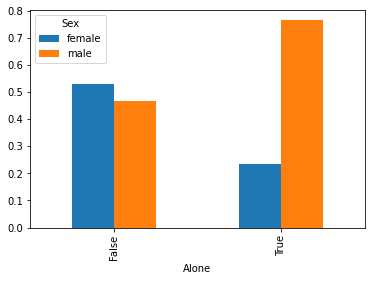

In [ ]:
sex_cond_alone_tab.plot.bar();

What are the highest values for `sibsp` (number of siblings/spouses) and `parch` (number of parents/children) by travel class?

In [ ]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
titanic['Pclass'].unique()

array([3, 1, 2])

In [ ]:
titanic['Pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [ ]:
titanic.groupby('Pclass')[ ['Parch', 'SibSp'] ].max()

,Parch,SibSp
Pclass,,
1,4,3
2,3,3
3,6,8


In [ ]:
import seaborn as sns

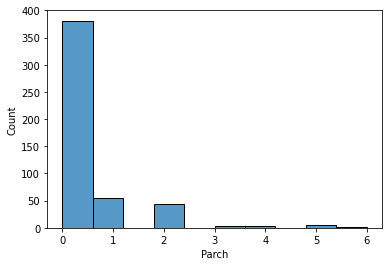

In [ ]:
sns.histplot(titanic.query("Pclass==3")['Parch'])